Step 1 : Creating the Dataset Using NumPy Arrays of 0s and
1s

In [2]:
# Creating data set
# A
a =[0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0]
    # Creating labels
y =[[1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]]

Step 2 : Visualizing the Dataset

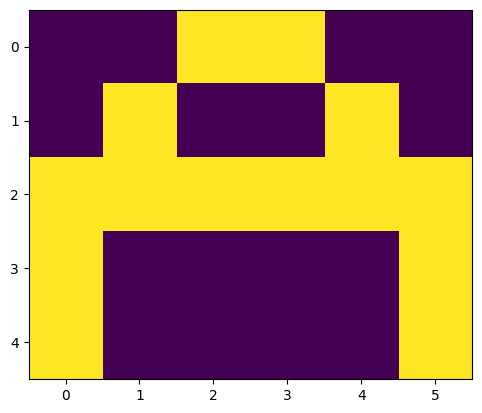

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

## Step 3 : As the data set is in the form of list we will convert it
into numpy array.**

In [4]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, '\n\n', y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## Step 4: Defining the Architecture of the Neural Network
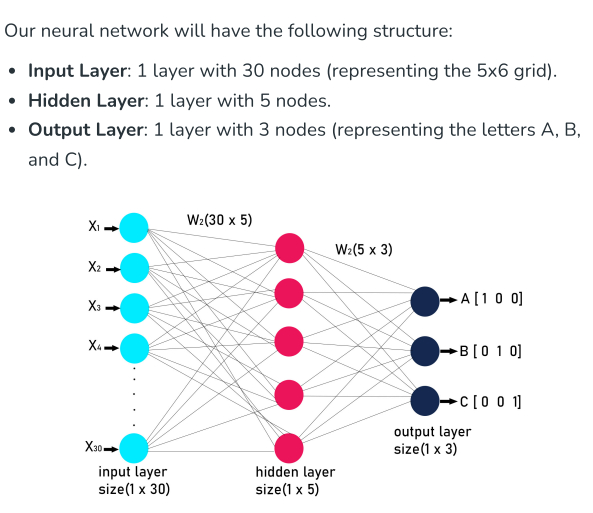

## Step 5: Defining the Neural Network Functions

In [5]:
# activation function
def sigmoid(x):
  return(1/(1 + np.exp(-x)))
# Creating the Feed forward neural network

def f_forward(x, w1, w2):
# hidden
  z1 = x.dot(w1) # input from layer 1
  a1 = sigmoid(z1) # out put of layer 2
  z2 = a1.dot(w2) # input of out layer
  a2 = sigmoid(z2) # output of out layer
  return(a2)
# initializing the weights randomly

def generate_wt(x, y):
  li =[]
  for i in range(x * y):
    li.append(np.random.randn())
  return(np.array(li).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
  s =(np.square(out-Y))
  s = np.sum(s)/len(y)
  return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
# hidden layer
  z1 = x.dot(w1)
  a1 = sigmoid(z1)
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)

  d2 =(a2-y)
  d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
  (np.multiply(a1, 1-a1)))
  # Gradient for w1 and w2
  w1_adj = x.transpose().dot(d1)
  w2_adj = a1.transpose().dot(d2)
  # Updating parameters
  w1 = w1-(alpha*(w1_adj))
  w2 = w2-(alpha*(w2_adj))
  
  return(w1, w2)


## Step 6: Initializing Weights

In [6]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-0.8788259   0.58278448 -0.2016513   0.4499229  -2.47461874]
 [ 0.75800295 -0.42986852  0.48256434 -1.22613346 -0.11001911]
 [-2.0632672  -0.86687276  0.07607612 -1.05499102  0.32524544]
 [-0.62990519  0.71974545  0.48239143 -1.48605166 -1.02528799]
 [ 2.65661455 -0.42706963 -0.92895183 -0.98929488  0.6222153 ]
 [ 0.53201108  1.51941623 -0.45657691  0.27835094 -0.55481534]
 [-0.1406284  -0.249342   -2.04641345  0.1409962  -0.88358159]
 [ 0.22733922 -0.76292245 -1.11883143 -1.15269932 -1.93497127]
 [-0.71942022 -0.19918018 -0.51688198 -0.68948437  1.75846564]
 [ 0.19156317  0.66384558 -1.7554109  -0.67523842 -1.84213955]
 [-1.68450583  0.39217155 -1.64964165 -1.92022487  2.08551873]
 [-1.15628033 -2.12854537 -1.95138855  1.18391573  0.95311029]
 [-0.21012726  1.46709096  0.32682754  0.56440292 -0.95759443]
 [-0.33950639 -0.09716783 -1.39102043 -0.02608428  0.46465587]
 [-0.57035567 -0.19080247 -0.13189316  1.12796909  0.30988402]
 [-0.41847293 -0.2016591  -0.12123854 -1.76931834 -0.15

## Step 7: Training the Model

In [7]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
  acc =[]
  losss =[]
  for j in range(epoch):
    l =[]
    for i in range(len(x)):
      out = f_forward(x[i], w1, w2)
      l.append((loss(out, Y[i])))
      w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
      print("epochs:", j + 1, "======== acc:", (1- (sum(l)/len(x)))*100)
    acc.append((1-(sum(l)/len(x)))*100)
    losss.append(sum(l)/len(x))
  return(acc, losss, w1, w2)
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 90.28350583476714
epochs: 1 ======== acc: 80.57181651310282
epochs: 1 ======== acc: 64.24614949995129
epochs: 2 ======== acc: 90.7230844573117
epochs: 2 ======== acc: 82.70823942345832
epochs: 2 ======== acc: 66.96073207839707
epochs: 3 ======== acc: 90.92970154045081
epochs: 3 ======== acc: 83.68327796896088
epochs: 3 ======== acc: 68.47104219836106
epochs: 4 ======== acc: 91.05601829927564
epochs: 4 ======== acc: 84.28433383171286
epochs: 4 ======== acc: 69.57125268537527
epochs: 5 ======== acc: 91.14209665333803
epochs: 5 ======== acc: 84.70287677508794
epochs: 5 ======== acc: 70.45661520604398
epochs: 6 ======== acc: 91.20447843312608
epochs: 6 ======== acc: 85.01581142252938
epochs: 6 ======== acc: 71.20680960251069
epochs: 7 ======== acc: 91.2515236632473
epochs: 7 ======== acc: 85.26275028034782
epochs: 7 ======== acc: 71.8638207211676
epochs: 8 ======== acc: 91.28798988146595
epochs: 8 ======== acc: 85.46686310271787
epochs: 8 ======== acc: 72.4530036425

## Step 8: Plotting Accuracy and Loss

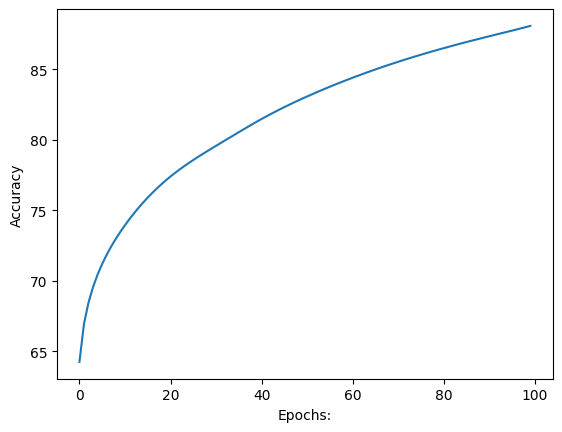

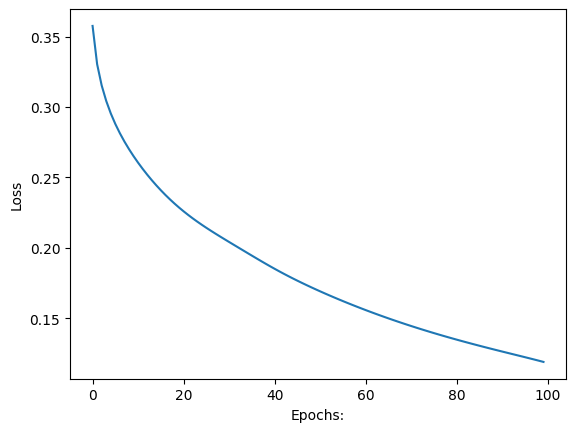

In [8]:
import matplotlib.pyplot as plt1
# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

## Step 9: Making Predictions

Image is of letter C.


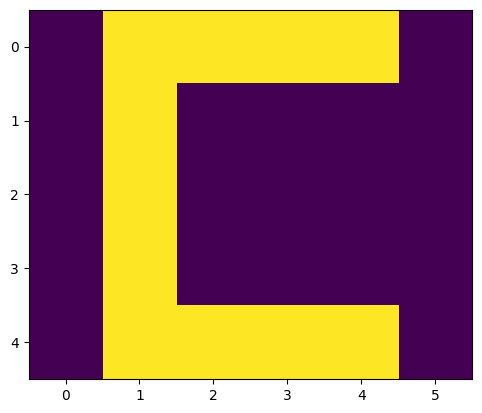

In [14]:
def predict(x, w1, w2):
  Out = f_forward(x, w1, w2)
  maxm = 0
  k = 0
  for i in range(len(Out[0])):
    if(maxm<Out[0][i]):
      maxm = Out[0][i]
      k = i
  if(k == 0):
    print("Image is of letter A.")
  elif(k == 1):
    print("Image is of letter B.")
  else:
    print("Image is of letter C.")
  plt.imshow(x.reshape(5, 6))
  plt.show()
# Example: Predicting for letter 'C'
predict(x[2], w1, w2)